In [222]:
import numpy as np
import matplotlib.pylab as plt
import math as mt

### 1. Definir la funcion $ e^{-x}$

In [223]:
#Exponential function
def exp_terms(x, n):
    return mt.pow(-x,n)/mt.factorial(n)

def exp_serie(x,N):
    s = 0
    for n in range(N+1):
        s+= exp_terms(x,n)
    return s

### 2. Calcular el valor de N que no sobrepase una estimacion de $10^{-7}$

In [224]:
def Valor_max_N(x,err):
    N=0
    while np.abs(exp_terms(x,N+1)/exp_serie(x,N))>=err:
        N += 1
    return N 

In [225]:
# tomemos un valor x<1 para estimar el valor de N con un error de 10^-7
x = float(input("""Ingresar un numero real que sea menor o igual que 1"""))
err = 1e-7
exp = 1/np.exp(x)
p = Valor_max_N(x,err)
print(f"""Cuando utilizamos el valor de x = {x} en la serie
se obtiene que el numero de iteracion es {Valor_max_N(x,err)} 
y se obtiene el valor de {exp_serie(x,9)} \n""")
print(f"""Cuando utilizamos el valor de x = {x} en la funcion que
genera numpy, se obtiene que el valor es {exp}""")

Ingresar un numero real que sea menor o igual que 1 0.2


Cuando utilizamos el valor de x = 0.2 en la serie
se obtiene que el numero de iteracion es 6 
y se obtiene el valor de 0.8187307530779542 

Cuando utilizamos el valor de x = 0.2 en la funcion que
genera numpy, se obtiene que el valor es 0.8187307530779818


In [226]:
#Error relativo:
err_abs = np.abs(exp_serie(x,Valor_max_N(x,err))-exp) #Error relativo
err_rel = np.abs(err_abs/exp)
print(f"""El error absoluto es --> {err_abs}
El error relativo es --> {err_rel}""")
print(f"""La comparacion que se obtiene al evaluar el valor de {x} en la serie
y en la funcion dada por python es de {err_rel}%, lo cual corresponde
a un error muy pequeño""")

El error absoluto es --> 2.477573812775802e-09
El error relativo es --> 3.026115488469773e-09
La comparacion que se obtiene al evaluar el valor de 0.2 en la serie
y en la funcion dada por python es de 3.026115488469773e-09%, lo cual corresponde
a un error muy pequeño


### 3. Examinar la serie para valores cercanos a 10


In [227]:
x = float(input("Ingresar valores que sean proximos a diez"))
exp = 1/np.exp(x)
print(f"""El numero de iteraciones para calcular la serie cuando x = {x} 
es de {Valor_max_N(x,err)} iteraciones """)
print(f"""Cuando remplazamos el valor de {x} en la serie que se definio, se obtiene el valor de 
{exp_serie(x,Valor_max_N(x,err))} y reemplazando el valor {x} en la funcion de numpy se obtiene
{exp}, lo que significa que a medida que tome valores más cercanos a 10 necesita más iteraciones,
esto probocando más capacidad de calculo.  """)

Ingresar valores que sean proximos a diez 9.99


El numero de iteraciones para calcular la serie cuando x = 9.99 
es de 45 iteraciones 
Cuando remplazamos el valor de 9.99 en la serie que se definio, se obtiene el valor de 
4.5856205079526375e-05 y reemplazando el valor 9.99 en la funcion de numpy se obtiene
4.585620664220731e-05, lo que significa que a medida que tome valores más cercanos a 10 necesita más iteraciones,
esto probocando más capacidad de calculo.  


### 5. Incrementando de 1-10 y de 10-100

Ingresar Algun valor de 1 hasta el 100 2


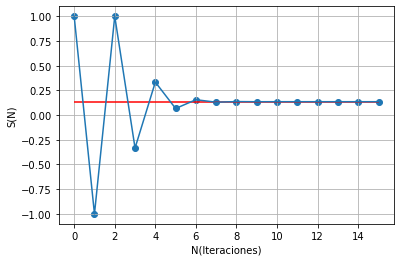

En la grafica se puede observar que hay puntos en los que
la serie fluctua y luego de un numero N de iteraciones se normaliza.
El valor de x que puede tomar la serie para que no diverge es de x = 67 


In [236]:
x = float(input("Ingresar Algun valor de 1 hasta el 100"))
Nmax = Valor_max_N(x,err)
N = np.arange(0,Nmax+1,1)
plt.scatter(N,[exp_serie(x,N[i]) for i in range(len(N))])
plt.plot(N,[exp_serie(x,N[i]) for i in range(len(N))])
plt.hlines(np.exp(-x),0,Nmax, color = "red")
plt.xlabel("N(Iteraciones)")
plt.ylabel("S(N)")
plt.grid()
plt.show()
print(f"""En la grafica se puede observar que hay puntos en los que
la serie fluctua y luego de un numero N de iteraciones se normaliza.
El valor de x que puede tomar la serie para que no diverge es de x = 67 """)